# Exploration of the Event Dataset
The purpose of this notebook is to get some impression and basic statistics of the event dataset.

In [3]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
from IPython.core.display import HTML as html

# Enable inline plotting
%matplotlib inline

# Show all columns in a table
pd.set_option('display.max_columns', None)

## Load Event Dataset
The path to the event dataset must be stored in the ```DATA_PATH``` variable. It can be generated using the ```merge_events_venues.py``` script.

In [2]:
DATA_PATH = "../scripts/events/data/merged_events.csv"

In [10]:
data = pd.read_csv(DATA_PATH,
                   parse_dates=["start_date", "end_date"],
                   index_col="id")
data["longitude"] = pd.to_numeric(data["longitude"], errors="coerce")
data["score"] = data["score"].replace(-1, 0)
data.head()

,guid,start_date,end_date,all_day,score,latitude,longitude
id,,,,,,,
6444,1496D842-29E1-11E2-B948-ADD068356B4B,2009-10-13 00:00:00,2009-10-13 00:00:00,False,0.0,40.728636,-73.984834
5635,1B18AE24-29E2-11E2-8674-D6A7258BE015,2010-11-24 01:00:00,2010-11-24 01:00:00,False,0.0,40.740192,-73.923637
4926,9626a4d8-dbf3-4415-84ac-7fd7fc05a749,2011-06-03 14:30:00,2011-06-03 14:30:00,False,0.0,40.741528,-73.782242
6964,CE862710-5C0B-11E2-9B0F-F96380BCCC38,2012-01-05 15:00:00,2012-01-05 15:00:00,False,0.0,40.900177,-73.911198
6965,CE9DEF94-5C0B-11E2-B469-89FA7A456421,2012-01-06 15:00:00,2012-01-06 15:00:00,False,0.0,40.900177,-73.911198


## Average Events per Day

In [3]:
data["just_start_date"] = data["start_date"].dt.date
grouped_data = data.groupby("just_start_date").count()
grouped_data["guid"].mean()

22.489494163424123

## Histogram of Events per Month

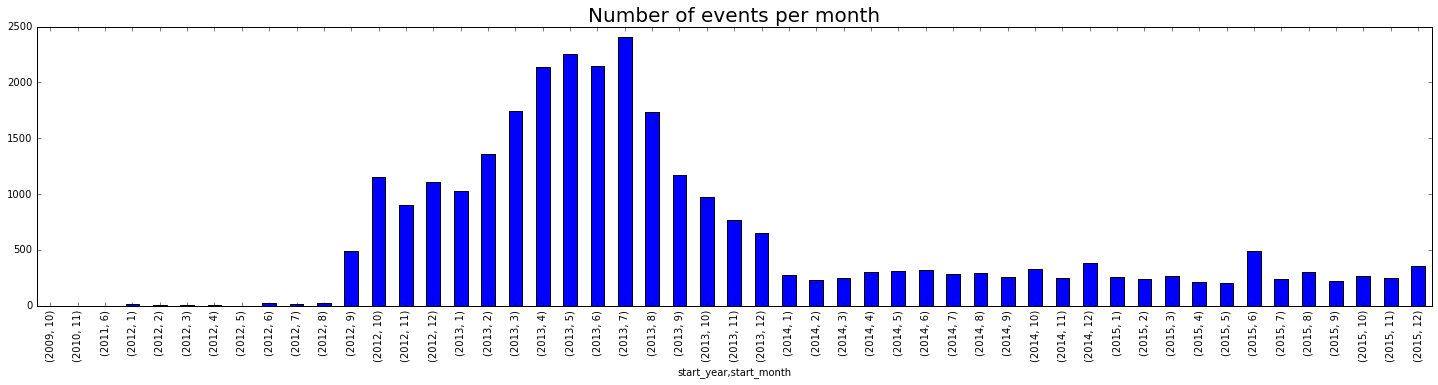

In [22]:
data["start_year"] = data["start_date"].dt.year
data["start_month"] = data["start_date"].dt.month
grouped_data = data.groupby(["start_year", "start_month"]).count()
ax = grouped_data["guid"].plot.bar(figsize=(25, 5))
ax.set_title("Number of events per month", fontsize=20)